# Labor market during the covid-19 pandemic (Brazil, 2020)

## Demographic profile, home office, wages and gender differences

Vitor Hugo Miro - March 2021


## About the data - National Household Sample Survey - PNAD COVID19

The data used in this project come from the National Household Sample Survey (Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19) conducted by the Brazilian Institute of Geography and Statistics (Instituto Brasileiro de Geografia e Estatística - IBGE).

**Survey description**

This survey aims at estimating the number of persons with symptoms associated with the flu syndrome and at following up the impact of the COVID-19 pandemic in the Brazilian labor market.

In this project we will focus on information about the labor market.

The data collection of the National Household Sample Survey - PNAD COVID19 began on May 4, 2020, with interviews by telephone in nearly 48 thousand households per week, adding up to nearly 193 thousand households per month in the entire National Territory. The sample is permanent, i.e., the households interviewed in the first month of data collection will remain in the sample along the next months, up to the end of the survey.

The questionnaire is divided into two parts, one directed to health issues, specifically on symptoms associated with the flu syndrome, and the other, to labor issues. The labor issues aim at ranking the population at working age in the following categories: employed, unemployed and persons out of the workforce. The following aspects are also investigated: employment and activity; work leave and reason for leaving; home office; search for work; reason for not searching for work; weekly hours effectively and usually worked; as well as the effective and usual earnings from labor.

Source: [https://www.ibge.gov.br/en/statistics/experimental-investigations/experimental-statistics/27975-weekly-release-pnadcovid1.html?=&t=o-que-e]


## About this project

The data has 114 columns / variables.
I will not use them all. The best strategy is to focus on a more restricted problem: the effects of the pandemic on the labor market and earnings.
Having defined the problem, I made a selection that included demographic characteristics, information on the labor market and earnings, and social distance in the covid-19 pandemic.

### Libraries

- NumPy (https://numpy.org/)

- Pandas (https://pandas.pydata.org)

- Matplotlib (https://matplotlib.org)

- Seaborn (https://seaborn.pydata.org)

In [1]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

### Gathering and assessing data

The data can be downloaded here:
https://www.ibge.gov.br/en/statistics/social/health/28049-monthly-edition-pnadcovid2.html?=&t=microdados

In [2]:
# Import data
df = pd.read_csv('PNAD_COVID_052020.csv')

In [3]:
df.shape

(349306, 114)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349306 entries, 0 to 349305
Columns: 114 entries, Ano to F006
dtypes: float64(71), int64(43)
memory usage: 303.8 MB


Based on the dictionary of variables it is possible to make a previous selection, considering that the base has 114 columns / variables.

### Variable selection for analysis

**Demographic characteristics**
- UF:Federation Unit (state)
- A002: age (years)
- A003: gender (1 = male; 2 = female)
- A004: race (1 = white; 2 = black; 3 = yellow (Japanese, Chinese or Korean in origin); 4 = brown (mestizos); 5 = indigenous; 9 = ignored)
- A005: education level

**Labor market**
- C001: Last week, for at least an hour, did you work or do any beaks? (1 = yes; 2 = no)
- C002: Last week, were you temporarily away from work? (1 = yes; 2 = no)
- C003: What is the main reason for this temporary leave?
        - 01. Was in quarantine, isolation, social distance or collective vacation
        - 02. Vacation, time off or variable working hours
        - 03. Maternity or paternity leave
        - 04. Paid leave due to the person's own health or accident
        - 05. Other type of paid leave (study, paternity, marriage, premium leave, etc.)
        - 06. Removal from the business / company due to pregnancy, health, accident, etc., without being paid by a social
        security institute
        - 07. Occasional factors (bad weather, shutdown in transport services, etc.)
        - 08. Another motive
        - Not applicable
- C007: In the job (single or main) that you had that week, it was:
        - 01. domestic worker,
        - 02. military, 
        - 03. military policeman, 
        - 04. employee of the private sector, 
        - 05. public sector employee,
        - 06. employer, 
        - 07. own account, 
        - 08. unpaid family worker,
        - 09. out of the labor market, 
        - not applicable
- C008: How many hours a week did you normally work?
- C013: Last week, were you in remote work (home office or telework)? (1 = yes; 2 = no)
- C015: Last week, did you take any effective steps to get a job? (1 = yes; 2 = no)
- C01012: How much he received (or withdrew) normally in all his works (Cash value)
- C011A12: How much he actually received (or withdrew) in all of his work (Cash value)

In [5]:
vars = ['UF', 'A002', 'A003', 'A004', 'A005', 'C001', 'C002', 'C003', 'C007', 'C009', 'C013', 'C015', 'C01012', 'C011A12']

In [6]:
df = df.filter(vars, axis=1)

In [7]:
df.head()

,UF,A002,A003,A004,A005,C001,C002,C003,C007,C009,C013,C015,C01012,C011A12
0,11,35,1,4,5,1.0,NaN,NaN,4.0,48.0,NaN,NaN,1045.0,1045.0
1,11,29,2,4,7,1.0,NaN,NaN,7.0,4.0,1.0,NaN,1045.0,0.0
2,11,13,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,10,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,58,2,2,1,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN


#### Rename variables
Using information from the data dictionary, the variables are renamed to facilitate analysis.


In [8]:
## rename variables
df.rename(columns={'A002':'age', 'A003':'gender', 'A004':'race', 'A005':'education',
                   'C001':'working', 'C002':'away', 'C003':'reason',
                   'C004':'paid_leave', 'C007':'labor_type', 'C009':'hours',
                   'C013': 'home_office', 'C015': 'job_search', 'C016': 'no_job_search_reason', 
                   'C01012':'habitual_wage', 'C011A12':'effective_wage'}, inplace=True)

> Note
- habitual wages ('habitual_wage') refer to wages usually received in the pre-pandemic period
- effective hours worked ('hours') and effective wages ('effective_wage') refer to the amount actually received in the reference period.

In [9]:
df.head()

,UF,age,gender,race,education,working,away,reason,labor_type,hours,home_office,job_search,habitual_wage,effective_wage
0,11,35,1,4,5,1.0,NaN,NaN,4.0,48.0,NaN,NaN,1045.0,1045.0
1,11,29,2,4,7,1.0,NaN,NaN,7.0,4.0,1.0,NaN,1045.0,0.0
2,11,13,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,10,1,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,58,2,2,1,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349306 entries, 0 to 349305
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UF              349306 non-null  int64  
 1   age             349306 non-null  int64  
 2   gender          349306 non-null  int64  
 3   race            349306 non-null  int64  
 4   education       349306 non-null  int64  
 5   working         287817 non-null  float64
 6   away            177607 non-null  float64
 7   reason          31062 non-null   float64
 8   labor_type      140287 non-null  float64
 9   hours           136340 non-null  float64
 10  home_office     16878 non-null   float64
 11  job_search      151477 non-null  float64
 12  habitual_wage   132375 non-null  float64
 13  effective_wage  132445 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 37.3 MB


All variables have numerical values, but many of them are categorical variables.
Categorical variables will be treated in the course of this analysis.

In [11]:
df.isna().sum()

UF                     0
age                    0
gender                 0
race                   0
education              0
working            61489
away              171699
reason            318244
labor_type        209019
hours             212966
home_office       332428
job_search        197829
habitual_wage     216931
effective_wage    216861
dtype: int64

Some columns have many missing values.
For labor market variables, this is common, since not all people interviewed by the survey are in the workforce.
In turn, in the workforce we have people who are employed and unemployed. Unemployed people do not receive wages. These factors must be considered when assessing the missing data.

In [12]:
df['gender'] = df['gender'].map({1:'male', 2:'female'}).astype("category")
df['race'] = df['race'].map({1:'white', 2:'black', 3:'yellow', 4:'brown', 5:'indigenous', 9:'ignored'}).astype("category")
df['education'] = df['education'].map({1:'illiteracy', 
                                       2:'incomplete elementary school', 
                                       3:'elementary school', 
                                       4:'incomplete high school', 
                                       5:'high school', 
                                       6:'incomplete undergraduate', 
                                       7: 'undergraduate', 
                                       8: 'graduate'}).astype("category")

## Demographic profile 

#### Geografic distribution

Sample size for each Brazilian state.

In [13]:
#dictionary with the name of the states
UF = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [14]:
df['UF'] = df['UF'].astype("category")

In [15]:
# sample count by state
dist_uf = df.UF.value_counts()
dist_uf.rename(index = UF, inplace = True)
dist_uf

São Paulo              33447
Minas Gerais           32197
Rio de Janeiro         25948
Santa Catarina         21626
Rio Grande do Sul      20527
Paraná                 18664
Bahia                  16673
Ceará                  15876
Maranhão               14547
Pernambuco             13843
Espírito Santo         13482
Goiás                  12760
Alagoas                10661
Mato Grosso            10542
Pará                   10507
Paraíba                 8659
Amazonas                8531
Sergipe                 8239
Mato Grosso do Sul      7985
Rio Grande do Norte     7634
Piauí                   7559
Distrito Federal        6434
Acre                    5926
Tocantins               5192
Rondônia                5070
Roraima                 4215
Amapá                   2562
Name: UF, dtype: int64

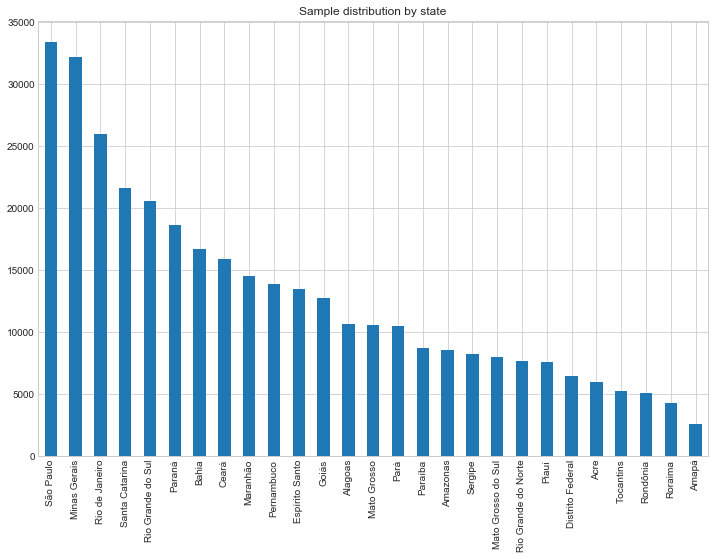

In [16]:
# plot sample distribution by state
dist_uf.plot(kind='bar', figsize=(12,8))
plt.title('Sample distribution by state');

> São Pualo, Minas Gerais e Rio de Janeiro are the states that have the largest number of observations in the sample.

##### Age distribution

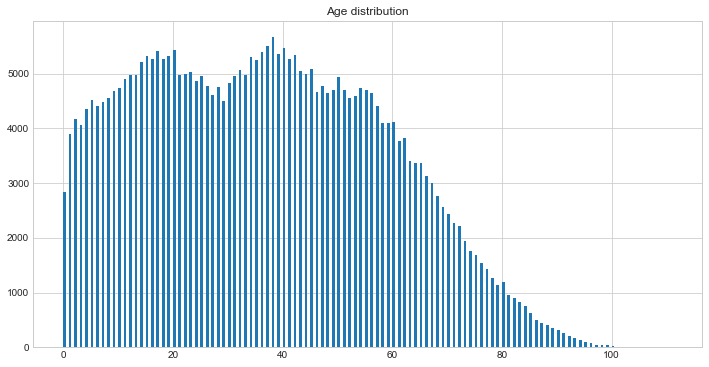

In [17]:
# plot age distribution
plt.figure(figsize = [12, 6])
bins = np.arange(0, df['age'].max()+1/2, 1/2)
plt.hist(data = df, x = 'age', bins = bins)
plt.title('Age distribution');

##### Gender

In [18]:
# Tabulate data by gender
genderdf = pd.DataFrame({'Frequency': df['gender'].value_counts(), 
                         'Proportion (%)': df['gender'].value_counts(normalize = True)*100})
genderdf

,Frequency,Proportion (%)
female,181594,51.987083
male,167712,48.012917


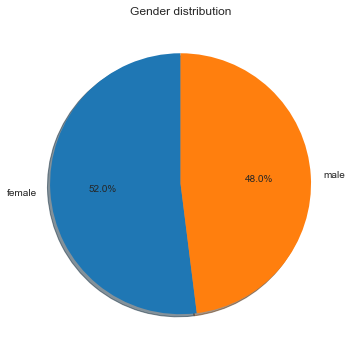

In [19]:
# plot gender distribution
plt.figure(figsize = [12, 6])
plt.pie(genderdf['Proportion (%)'], labels = genderdf.index,
        startangle = 90, 
        shadow = True,
       autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

> The sample is well divided, with 48% men and 52% women.

##### Race

In [20]:
# Tabulate data by gender
racedf = pd.DataFrame({'Frequency': df['race'].value_counts(), 
                         'Proportion (%)': df['race'].value_counts(normalize = True)*100})
racedf

,Frequency,Proportion (%)
brown,169114,48.414284
white,147713,42.287564
black,28699,8.216005
yellow,2314,0.662456
indigenous,1334,0.381900
ignored,132,0.037789


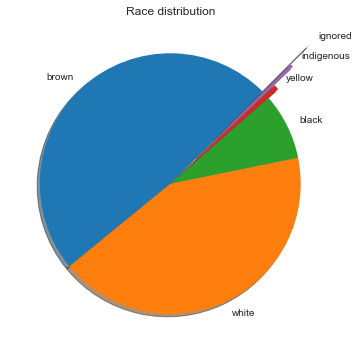

In [21]:
# plot gender distribution
plt.figure(figsize = [12, 6])
plt.pie(racedf['Proportion (%)'], labels = racedf.index,
        startangle = 45, 
        shadow = True, 
        explode = (0,0,0,0.1,0.3,0.5))
plt.title('Race distribution')
plt.show()

> People who claim to be brown and white represent the largest proportion of the sample. 48,4% declared themselves brown and 42,3% declared themselves white. The proportion of people who declared themselves black corresponds to 8,2% of the sample.

##### Education

In [22]:
#Tabulate the distribution of schooling
educdf = pd.DataFrame({'Frequency': df['education'].value_counts(), 
                         'Proportion (%)': df['education'].value_counts(normalize = True)*100})
educdf

,Frequency,Proportion (%)
incomplete elementary school,115648,33.107934
high school,79226,22.680973
illiteracy,36785,10.530881
undergraduate,34081,9.756775
incomplete high school,32889,9.415527
elementary school,23682,6.779729
incomplete undergraduate,18346,5.252129
graduate,8649,2.476053


In [23]:
# Ordered list with educational levels 
educ_levels = ['graduate', 'undergraduate', 'incomplete undergraduate', 'high school', 'incomplete high school', 
               'elementary school', 'incomplete elementary school',  'illiteracy']

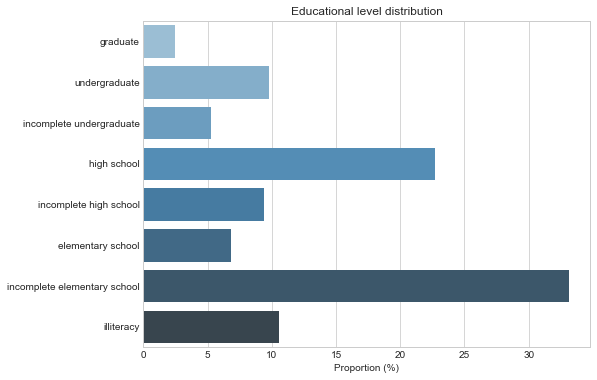

In [24]:
# plot schooling distribution
plt.figure(figsize = [8, 6])
sns.barplot(x='Proportion (%)', y=educdf.index, data=educdf, order=educ_levels, palette="Blues_d")
plt.title('Educational level distribution');

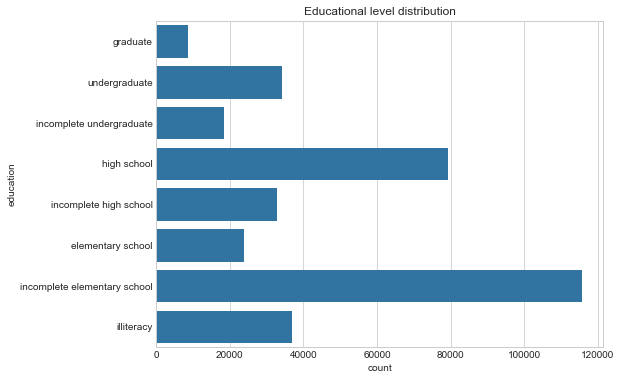

In [25]:
# plot schooling distribution (using base color)
base_color = sns.color_palette()[0]

plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='education', color=base_color, order=educ_levels)
plt.title('Educational level distribution');

> This information reveals a relatively low level of education in the Brazilian sample. According to the data, 33.1% of the sample has incomplete elementary school and 22% have completed high school. In this sample, only 12.22% completed undergraduate or graduate (9.75+2.47) and 10.53% have no education level (iliteracy).

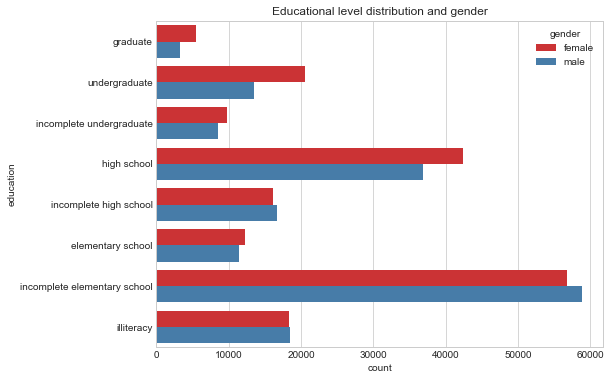

In [26]:
# plot schooling distribution by gender
plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='education', hue="gender", order=educ_levels, palette="Set1")
plt.title('Educational level distribution and gender');

> In this last plot we have interesting information! Women account for a higher proportion at higher levels of education.

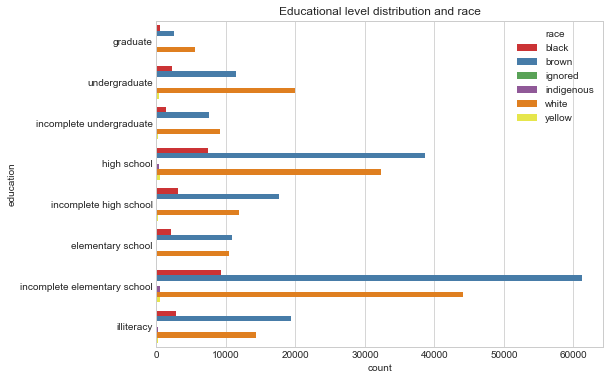

In [27]:
# plot schooling distribution by gender
plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='education', hue="race", order=educ_levels, palette="Set1")
plt.title('Educational level distribution and race');

In [28]:
# create a copy of the data with partial analysis
dfl = df.copy()
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349306 entries, 0 to 349305
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   UF              349306 non-null  category
 1   age             349306 non-null  int64   
 2   gender          349306 non-null  category
 3   race            349306 non-null  category
 4   education       349306 non-null  category
 5   working         287817 non-null  float64 
 6   away            177607 non-null  float64 
 7   reason          31062 non-null   float64 
 8   labor_type      140287 non-null  float64 
 9   hours           136340 non-null  float64 
 10  home_office     16878 non-null   float64 
 11  job_search      151477 non-null  float64 
 12  habitual_wage   132375 non-null  float64 
 13  effective_wage  132445 non-null  float64 
dtypes: category(4), float64(9), int64(1)
memory usage: 28.0 MB


## Labor

I will restrict the analysis of the labor market by considering people in the workforce aged between 15 and 65 years old.

In [29]:
# filter by age when people are most active in the job market
dfl = dfl[(dfl['age'] >= 15) & (dfl['age'] <= 65)]

In [30]:
dfl['age'].describe()

count    245029.000000
mean         38.789033
std          14.306415
min          15.000000
25%          26.000000
50%          39.000000
75%          51.000000
max          65.000000
Name: age, dtype: float64

#### Working

In [31]:
# individuals who are working
dfl['working'] = dfl['working'].map({1:'yes', 2:'no'}).astype("category")

In [32]:
dfl['working'].value_counts()

no     138376
yes    106653
Name: working, dtype: int64

In [33]:
dfl['working'].value_counts(normalize=True)*100

no     56.473315
yes    43.526685
Name: working, dtype: float64

> Only 43.52% of the sample, between 15 and 65 years old, was working at the time of collecting survey data.
This represents 106,653 observations / people.

#### Away

In [34]:
# individuals who are away (employed)
dfl['away'] = dfl['away'].map({1:'yes', 2:'no'}).astype("category")

In [35]:
dfl[(dfl['working'] == 'no')]['away'].value_counts()

no     108471
yes     29905
Name: away, dtype: int64

In [36]:
dfl[(dfl['working'] == 'no')]['away'].value_counts(normalize=True)*100

no     78.388593
yes    21.611407
Name: away, dtype: float64

> Of the 138,376 people who were not working in the reference period of the survey, 29,905 were away from work for some reason.

#### Job Seach

Individuals who are not employed (unemployed) but are looking for a job are considered in the workforce.

In [37]:
dfl['job_search'] = df['job_search'].map({1:'yes', 2:'no'})

In [38]:
dfl['job_search'].value_counts()

no     98236
yes    14562
Name: job_search, dtype: int64

> 14,562 said they were looking for a job.

### Labor market/ work status

In [39]:
# status in the labor market
dfl.loc[dfl['working'] == 'yes', 'work_status'] = 'employed'
dfl.loc[(dfl['working'] == 'no') & (dfl['away'] == 'yes'), 'work_status'] = 'away'
dfl.loc[(dfl['working'] == 'no') & (dfl['away'] == 'no') & (dfl['job_search'] == 'yes'), 'work_status'] = 'unemployed'
dfl.loc[(dfl['working'] == 'no') & (dfl['away'] == 'no') & (dfl['job_search'] == 'no'), 'work_status'] = 'inactive'

In [40]:
work_status = pd.DataFrame({'Frequency': dfl['work_status'].value_counts(), 
                         'Proportion (%)': dfl['work_status'].value_counts(normalize = True)*100})
work_status

,Frequency,Proportion (%)
employed,106653,43.526685
inactive,94541,38.583596
away,29905,12.204678
unemployed,13930,5.685041


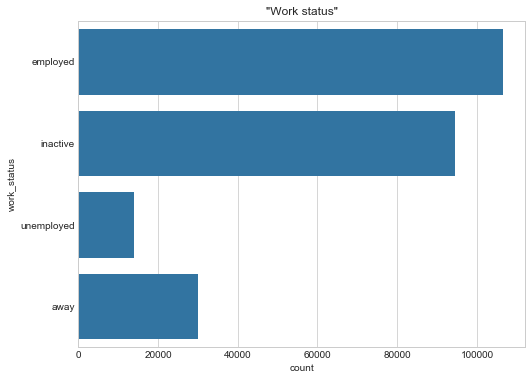

In [41]:
plt.figure(figsize = [8, 6])
sns.countplot(data=dfl, y='work_status', color=base_color)
plt.title('"Work status"');

> Of the sample, 38.8% of people were not active in the labor market, either working or looking for a job; 12.2% were away from work and 5.68% were not working and were looking for work.

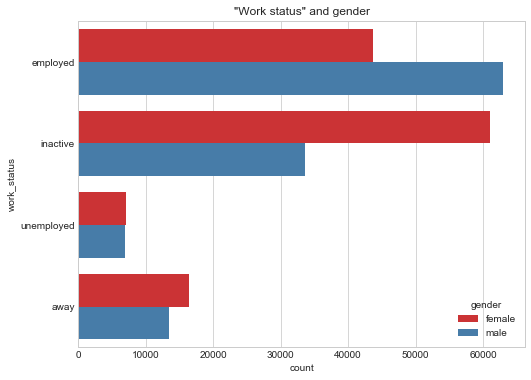

In [42]:
plt.figure(figsize = [8, 6])
sns.countplot(data=dfl, y='work_status', hue="gender", palette="Set1")
plt.title('"Work status" and gender');

> When considering gender, men are the majority among employees. In turn, women are the majority among the inactive and those who were away from work.

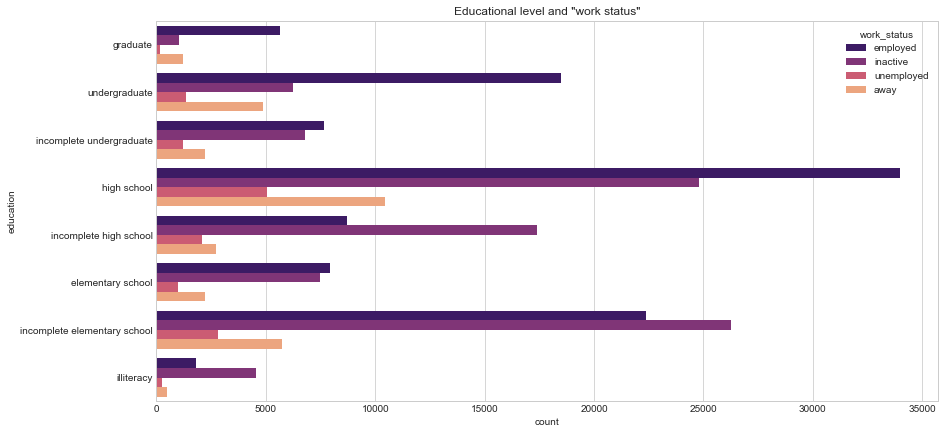

In [43]:
plt.figure(figsize = [14, 7])
sns.countplot(data=dfl, y='education', hue="work_status", order=educ_levels, palette="magma")
plt.title('Educational level and "work status"');

In [44]:
tabws = pd.crosstab(dfl['education'], dfl['work_status'], normalize='index')*100
tabws

work_status,away,employed,inactive,unemployed
education,,,,
elementary school,11.984315,42.603137,40.121401,5.291147
graduate,14.991906,70.302578,12.738140,1.967376
high school,14.077814,45.776791,33.361605,6.783791
illiteracy,6.730498,25.499859,64.010138,3.759504
incomplete elementary school,10.062014,39.093371,45.897458,4.947157
incomplete high school,8.778008,28.250874,56.278332,6.692786
incomplete undergraduate,12.280604,42.755729,38.060369,6.903298
undergraduate,15.709628,59.743068,20.199477,4.347826


> The plot above shows the status in the job market by education. It is observed that most of the unemployed have finished high school, few then among graduates and undergraduates. The inactive are also concentrated among those who only had high school and among those who had incomplete elementary school. In relative terms, unemployment is higher for those who have incomplete high school (6.7%) or undergraduate (6.9%) education. The highest proportion of inactive people is observed among the illiterate (64%). And the largest proportion of employees is among graduates (70.3%).


### Reason for away from work

In [45]:
dfl['reason'].value_counts()

1.0    24349
2.0     1730
4.0     1330
8.0      850
6.0      676
3.0      496
7.0      352
5.0      122
Name: reason, dtype: int64

In [46]:
dfl['away_reason'] = np.where(dfl['reason'] == 1, 'quarantine', np.where(dfl['reason'] == 2, 'health problem', 'other'))

In [47]:
reasondf = pd.DataFrame({'Frequency': dfl[dfl['away'] == 'yes']['away_reason'].value_counts(), 
                         'Proportion (%)': dfl[dfl['away'] == 'yes']['away_reason'].value_counts(normalize=True)*100})
reasondf

,Frequency,Proportion (%)
quarantine,24349,81.421167
other,3826,12.793847
health problem,1730,5.784986


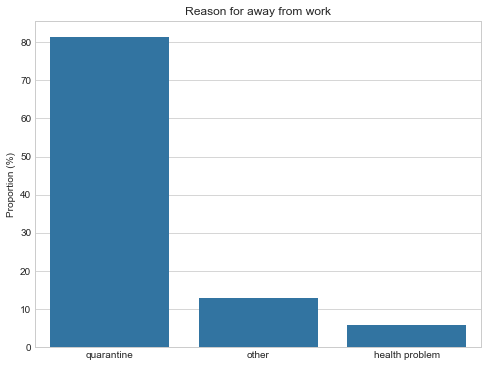

In [48]:
plt.figure(figsize = [8, 6])
sns.barplot(data=reasondf, y='Proportion (%)', x=reasondf.index, color=base_color)
plt.title('Reason for away from work');

> 81% of the people who were away were motivated by measures of social distance due to the covid-19 pandemic.

### Labor type

In [49]:
dfl['labor_type'] = dfl['labor_type'].map({1:'domestic worker', 
                                         2:'army military', 
                                         3:'military policeman/fireman', 
                                         4:'private sector employee', 
                                         5:'public sector employee', 
                                         6:'employer', 
                                         7:'self-employed',
                                         8:'unpaid family worker',
                                         9:'out of the labor market'}).astype("category")

In [50]:
dfl[(dfl['work_status'] == 'employed')]['labor_type'].value_counts()

private sector employee       45687
self-employed                 31342
public sector employee        14229
domestic worker                5308
employer                       3564
out of the labor market        2998
unpaid family worker           2457
military policeman/fireman      558
army military                   510
Name: labor_type, dtype: int64

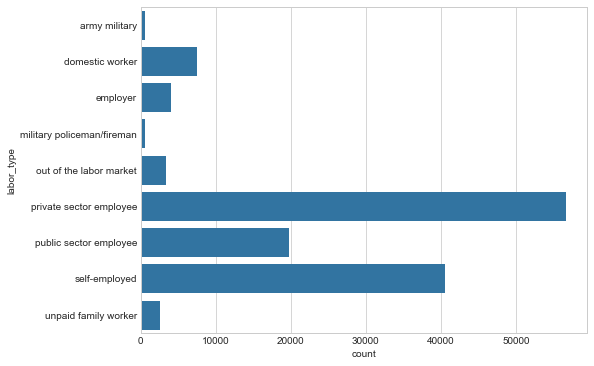

In [51]:
#df['labor_type'].value_counts().plot(kind = 'bar');
plt.figure(figsize = [8, 6])
sns.countplot(data=dfl, y='labor_type', color=base_color);

In [52]:
pd.crosstab(dfl['labor_type'], dfl['away_reason'])

away_reason,health problem,other,quarantine
labor_type,,,
army military,10,526,33
domestic worker,69,5471,1925
employer,6,3602,419
military policeman/fireman,26,580,41
out of the labor market,6,3082,321
private sector employee,1167,47144,8309
public sector employee,331,14817,4582
self-employed,112,32278,8172
unpaid family worker,3,2525,83


### Home Office

In [53]:
dfl['home_office'] = dfl['home_office'].map({1:'yes', 2:'no'}).astype("category")

In [54]:
dfl['home_office'].value_counts()

yes    11585
no      4849
Name: home_office, dtype: int64

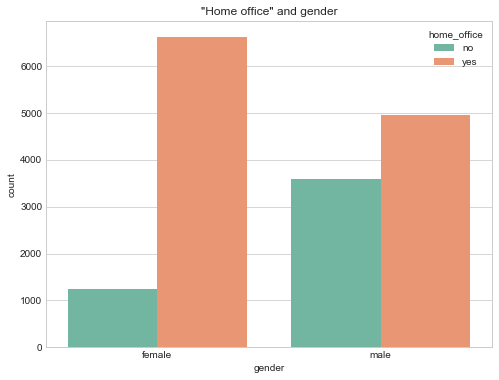

In [55]:
plt.figure(figsize = [8, 6])
sns.countplot(data=dfl, x='gender', hue="home_office", palette="Set2")
plt.title('"Home office" and gender');

> The proportion of women who are working at home-office is higher than men.

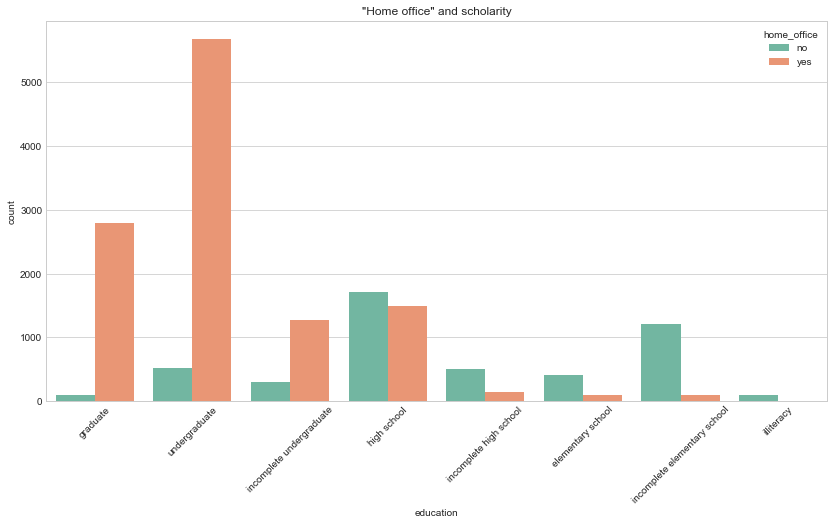

In [56]:
plt.figure(figsize = [14, 7])
sns.countplot(data=dfl, x='education', hue="home_office", order=educ_levels, palette="Set2")
plt.xticks(rotation=45)
plt.title('"Home office" and scholarity');

> TThe home office is more common among the more educated.
Most graduates and undergraduates were in home office during the period of "social isolation". In turn, few workers with less education took advantage of this work regime.

In [57]:
pd.crosstab(dfl['labor_type'], dfl['home_office'])

home_office,no,yes
labor_type,,
army military,18,30
employer,99,386
military policeman/fireman,38,25
private sector employee,1751,4908
public sector employee,496,4562
self-employed,2372,1642
unpaid family worker,75,32


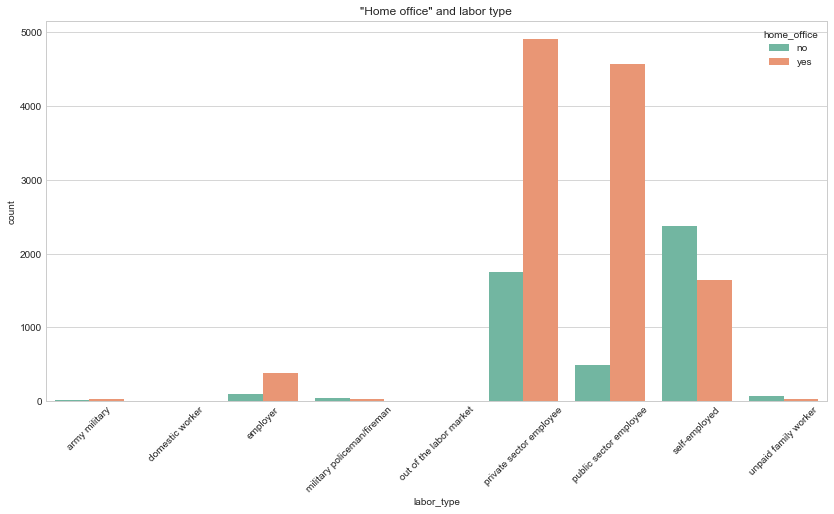

In [58]:
plt.figure(figsize = [14, 7])
sns.countplot(data=dfl, x='labor_type', hue="home_office", palette="Set2")
plt.xticks(rotation=45)
plt.title('"Home office" and labor type');

> The home office was more adopted by employers, employed in the public and private sectors. In turn, it was less adopted among self-employed workers.

## Wages

On the "original" basis we have different variables for income from work. Here I am going to use cash income, denominated in two categories: habitual and effective. The usual income refers to the income usually received (proxy for the pre-pandemic income) and the effective income (the amount actually received in the reference month of the survey).

In [59]:
dfw = dfl.copy()

In [60]:
dfw = dfw[(dfw['work_status']=='employed')]

In [61]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106653 entries, 0 to 349302
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   UF              106653 non-null  category
 1   age             106653 non-null  int64   
 2   gender          106653 non-null  category
 3   race            106653 non-null  category
 4   education       106653 non-null  category
 5   working         106653 non-null  category
 6   away            0 non-null       category
 7   reason          0 non-null       float64 
 8   labor_type      106653 non-null  category
 9   hours           103655 non-null  float64 
 10  home_office     16434 non-null   category
 11  job_search      2998 non-null    object  
 12  habitual_wage   100263 non-null  float64 
 13  effective_wage  100336 non-null  float64 
 14  work_status     106653 non-null  object  
 15  away_reason     106653 non-null  object  
dtypes: category(8), float64(4), int64(1), 

In [62]:
dfw[['habitual_wage', 'effective_wage']].describe()

,habitual_wage,effective_wage
count,100263.000000,100336.000000
mean,2307.652464,2005.573224
std,3174.392502,2849.592010
min,2.000000,0.000000
25%,1045.000000,820.000000
50%,1500.000000,1200.000000
75%,2500.000000,2000.000000
max,180000.000000,140000.000000


C:\Users\vitor\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vitor\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


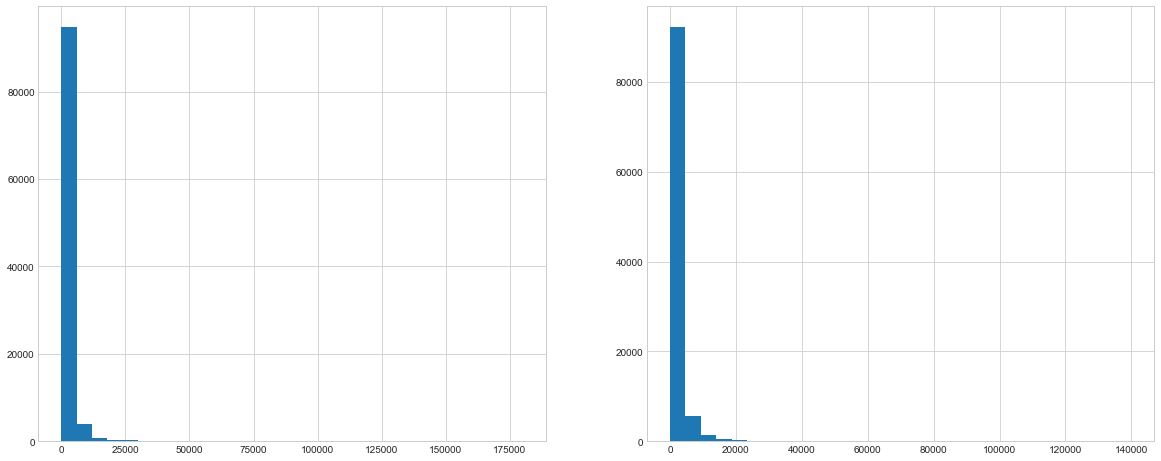

In [63]:
plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1)
plt.hist(data = dfw, x = 'habitual_wage', bins=30)

plt.subplot(1, 2, 2)
plt.hist(data = dfw, x = 'effective_wage', bins=30);


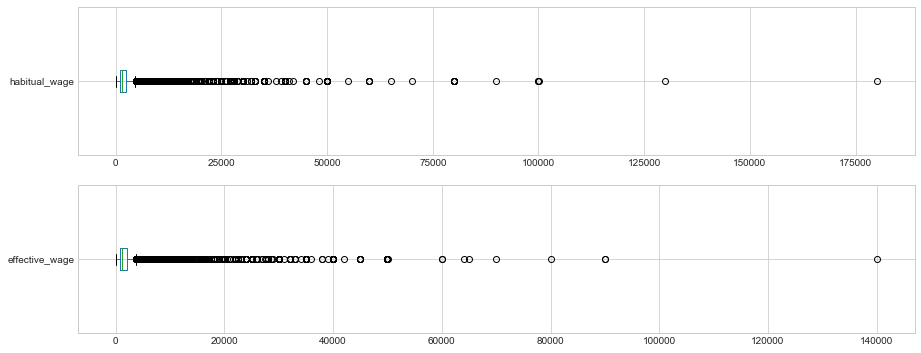

In [64]:
plt.subplot(2, 1, 1)
dfw['habitual_wage'].plot(kind='box', vert=False, figsize=(15, 6))

plt.subplot(2, 1, 2)
dfw['effective_wage'].plot(kind='box', vert=False, figsize=(15, 6));

> In the plots above, it is possible to notice outliers that distort the distribution of wages a lot.

In [65]:
print("90º percentil = ",dfw['habitual_wage'].quantile(0.90))
print("95º percentil = ",dfw['habitual_wage'].quantile(0.95))
print("99º percentil = ",dfw['habitual_wage'].quantile(0.99))

90º percentil =  4500.0
95º percentil =  7000.0
99º percentil =  15000.0


In [66]:
print("90º percentil = ",dfw['effective_wage'].quantile(0.90))
print("95º percentil = ",dfw['effective_wage'].quantile(0.95))
print("99º percentil = ",dfw['effective_wage'].quantile(0.99))

90º percentil =  4000.0
95º percentil =  6000.0
99º percentil =  15000.0


> I chose to exclude values above the 95th percentile in an attempt to obtain a more regular distribution of wages.

In [67]:
dfw = dfw[(dfw['habitual_wage'] > 0) & (dfw['habitual_wage'] <= 7000)]
dfw = dfw[(dfw['effective_wage'] > 0) & (dfw['effective_wage'] <= 6000)]

In [68]:
dfw[['habitual_wage', 'effective_wage']].describe()

,habitual_wage,effective_wage
count,90627.000000,90627.000000
mean,1774.240668,1586.047028
std,1217.181897,1154.500267
min,2.000000,2.000000
25%,1045.000000,990.000000
50%,1400.000000,1200.000000
75%,2100.000000,2000.000000
max,7000.000000,6000.000000


C:\Users\vitor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vitor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


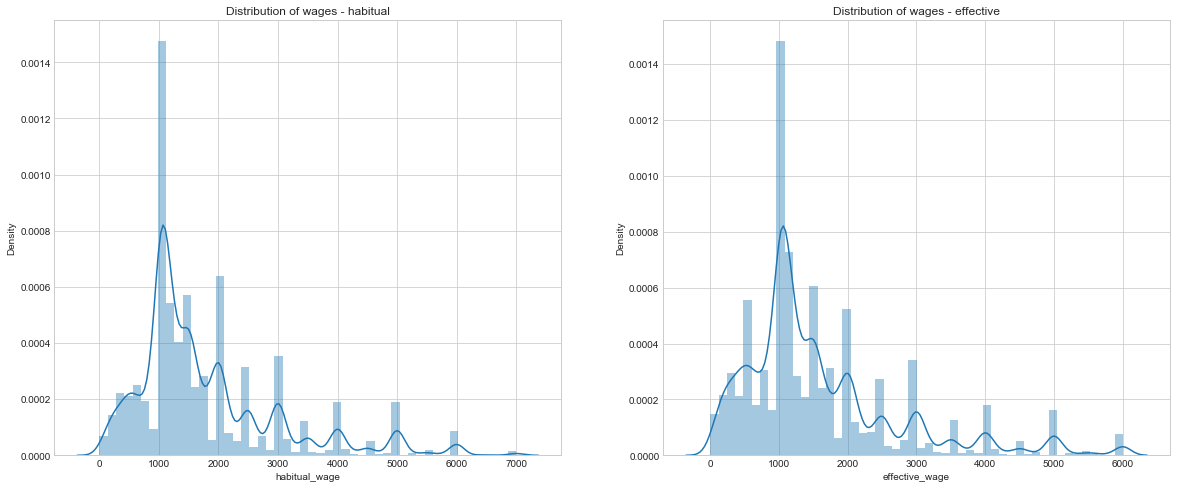

In [69]:
plt.figure(figsize = [20, 8])

plt.subplot(1, 2, 1)
sns.distplot(dfw['habitual_wage'])
plt.title('Distribution of wages - habitual');

plt.subplot(1, 2, 2)
sns.distplot(dfw['effective_wage'])
plt.title('Distribution of wages - effective');

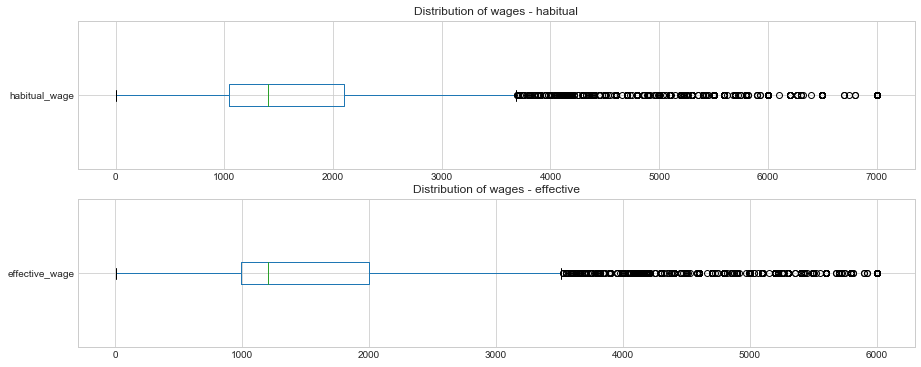

In [70]:
plt.subplot(2, 1, 1)
dfw['habitual_wage'].plot(kind='box', vert=False, figsize=(15, 6))
plt.title('Distribution of wages - habitual');

plt.subplot(2, 1, 2)
dfw['effective_wage'].plot(kind='box', vert=False, figsize=(15, 6))
plt.title('Distribution of wages - effective');

> It is still possible to visualize the presence of many discrepant data in the upper tail of the distribution, but I will not exclude them, since the inequality of the distribution, in itself, can be an important information for the analysis.

#### Wages and gender

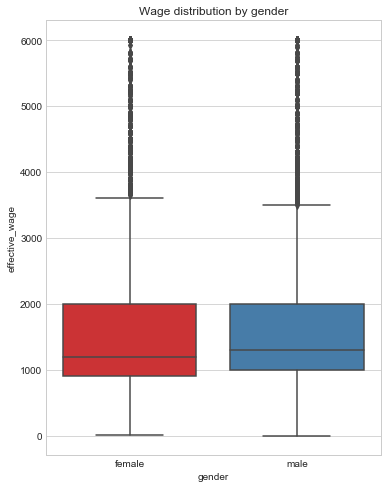

In [71]:
plt.figure(figsize = [6, 8])
sns.boxplot(data = dfw, x='gender', y='effective_wage', palette="Set1")
plt.title('Wage distribution by gender');

> The above plot shows that the distribution of men's wages is above the median of women's wages.

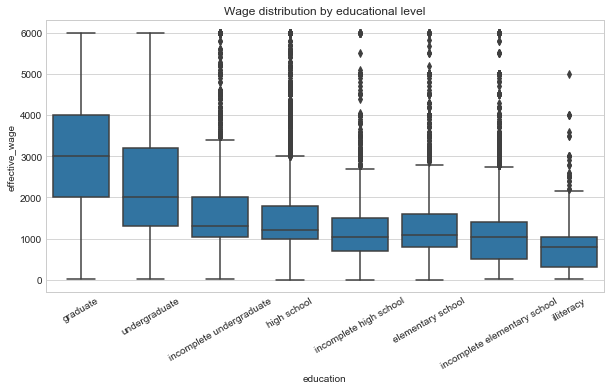

In [72]:
plt.figure(figsize = [10, 5])
sns.boxplot(data=dfw, x='education', y='effective_wage', order=educ_levels, color=base_color)
plt.title('Wage distribution by educational level')
plt.xticks(rotation=30);

> The above plot confirms that, through the data, that more educated workers earn higher wages.

An alternative way to visualize this information is through the violin plot.

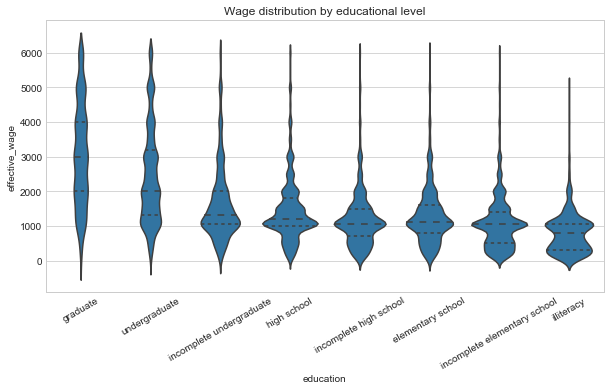

In [73]:
plt.figure(figsize = [10, 5])

sns.violinplot(data=dfw, x='education', y='effective_wage', order=educ_levels, color=base_color, inner='quartile')
plt.title('Wage distribution by educational level')
plt.xticks(rotation=30);

**log transformation**

Applying the natural logarithm, we now have a variable with approximately log-normally distribution.

In [74]:
# log transformation
dfw['ln_hab_wage'] = np.log(dfw['habitual_wage'])
# log transformation (+ 1 because there were null values)
dfw['ln_ef_wage'] = np.log(dfw['effective_wage'])

C:\Users\vitor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vitor\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


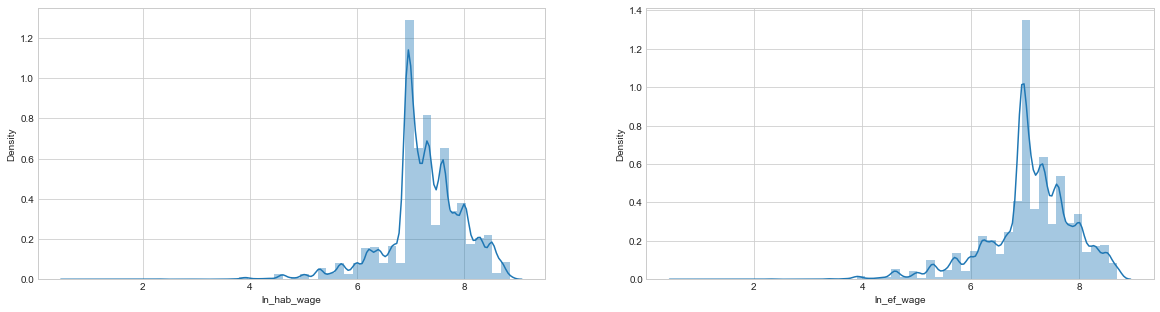

In [75]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.distplot(dfw['ln_hab_wage'])

plt.subplot(1, 2, 2)
sns.distplot(dfw['ln_ef_wage']);

> The logarithmic transformation does not improve the visualization much. It can, however, be useful in a modeling process.

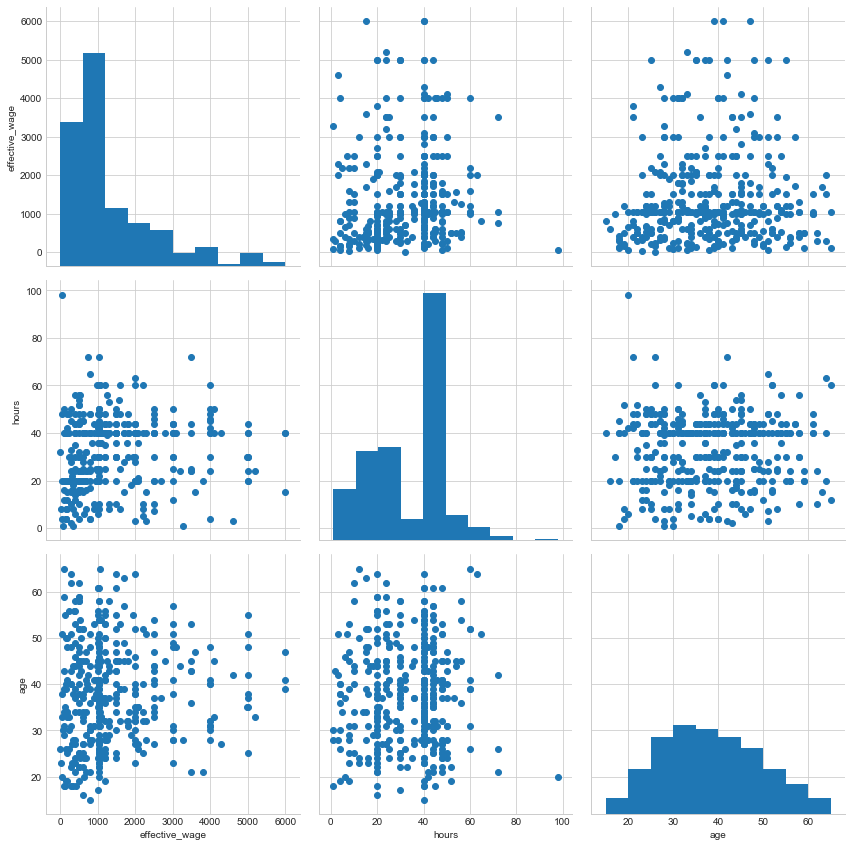

In [76]:
samples = np.random.choice(dfw.shape[0], 2000, replace=False)
dfw_sample = dfw.loc[dfw.index.intersection(samples), ]

g = sns.PairGrid(data = dfw_sample, vars = ['effective_wage', 'hours', 'age'], height=4)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

> The facet above shows numerical variables such as wages, hours worked and age. In addition to distributions, the scatterplots do not indicate a very clear relationship. For this we will use the heatmap to indicate the correlations between these variables.

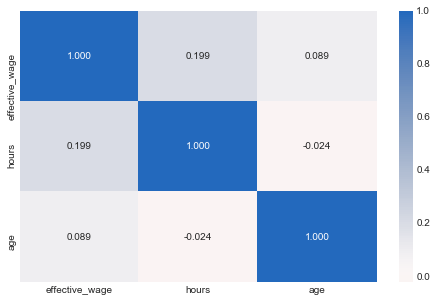

In [77]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(dfw[['effective_wage', 'hours', 'age']].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

> We don't have a very strong correlation between the variables.

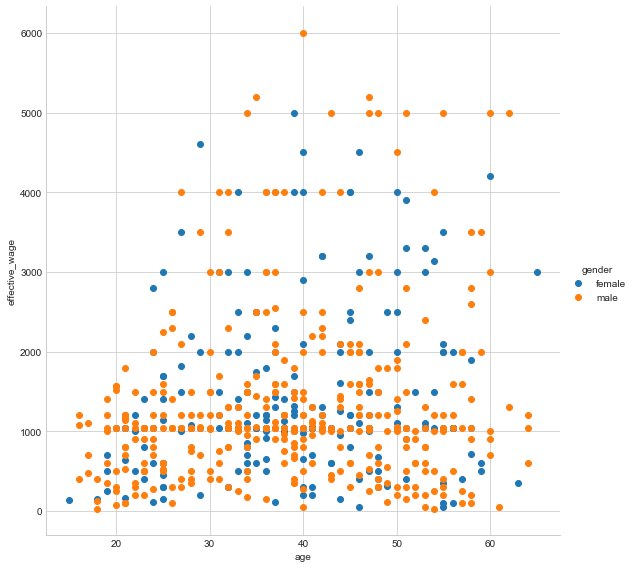

In [78]:
samples = np.random.choice(dfw.shape[0], 3000, replace=False)
dfw_sample = dfw.loc[dfw.index.intersection(samples), ]

g = sns.FacetGrid(data = dfw_sample, hue = 'gender', height = 8)
g.map(plt.scatter, 'age', 'effective_wage')
g.add_legend();

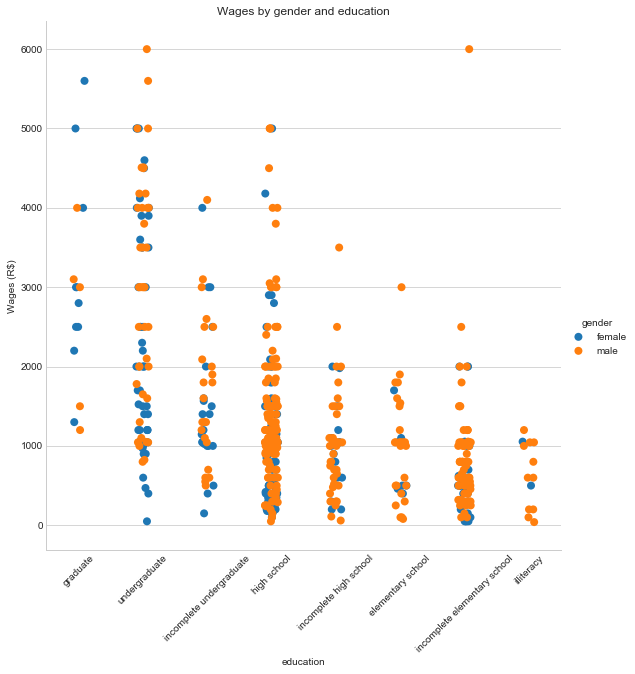

In [79]:
samples = np.random.choice(dfw.shape[0], 3000, replace=False)
dfw_sample = dfw.loc[dfw.index.intersection(samples), ]

g = sns.FacetGrid(data = dfw_sample, hue = 'gender', height=8)
g.map(sns.stripplot, 'education', 'effective_wage', jitter=True, size=8, order=educ_levels)
plt.title('Wages by gender and education')
g.add_legend();
plt.xticks(rotation=45)
plt.ylabel('Wages (R$)');


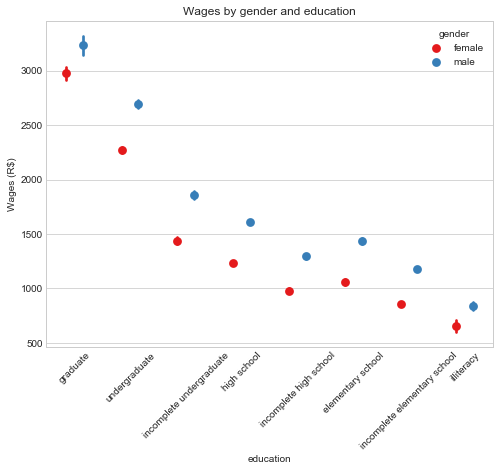

In [80]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = dfw, x = 'education', y = 'effective_wage', hue = 'gender',
           palette = 'Set1', linestyles = '', dodge = 0.3, order=educ_levels)
plt.title('Wages by gender and education')
plt.ylabel('Wages (R$)')
#plt.yscale('log')
plt.xticks(rotation=45)
plt.show();

> In these last plots we have evidence that men's wages are higher than women's for each level of education.

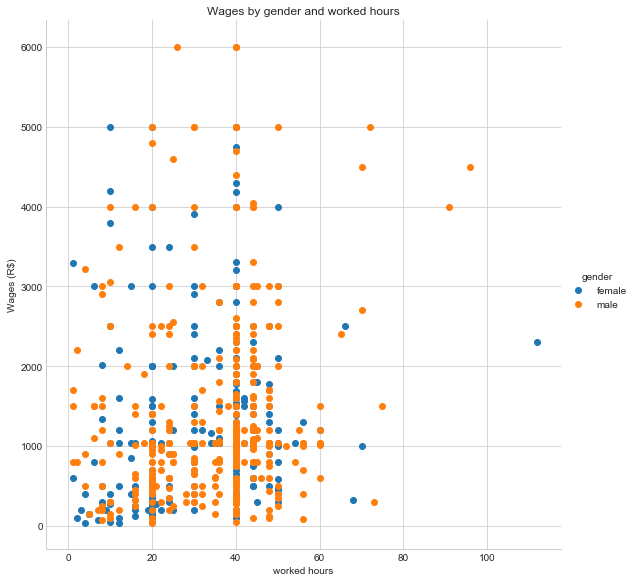

In [81]:
samples = np.random.choice(dfw.shape[0], 3000, replace=False)
dfw_sample = dfw.loc[dfw.index.intersection(samples), ]

g = sns.FacetGrid(data = dfw_sample, hue = 'gender', height = 8)
g.map(plt.scatter, 'hours', 'effective_wage')
g.add_legend()
plt.ylabel('Wages (R$)')
plt.xlabel('worked hours')
plt.title('Wages by gender and worked hours');

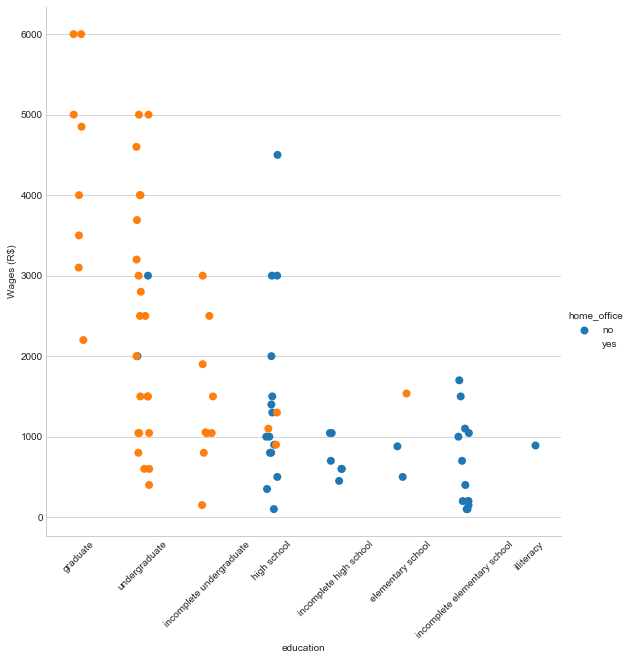

In [82]:
samples = np.random.choice(dfw.shape[0], 3000, replace=False)
dfw_sample = dfw.loc[dfw.index.intersection(samples), ]

g = sns.FacetGrid(data = dfw_sample, hue = 'home_office', height=8)
g.map(sns.stripplot, 'education', 'effective_wage', jitter=True, size=8, order=educ_levels)
plt.ylabel('Wages (R$)')
plt.xticks(rotation=45)
g.add_legend();

> In this last plot we have evidence that more educated and better paid people had the opportunity to create the home office. People with less education could not choose this type of work, having greater exposure during the pandemic.